TASK 5 :- CREDIT CARD FRAUD DETECTION

> Author: sambith biswal 

> Batch: NOVEMBER A13

> Aim: To build a machine learning model to identify fraudulent credit card transactions.

## Importing the Required Library packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


#Reading The Credit Card  Data File

In [2]:
data = pd.read_csv('/content/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# DATA ANALYSIS

Text(0, 0.5, 'Frequency')

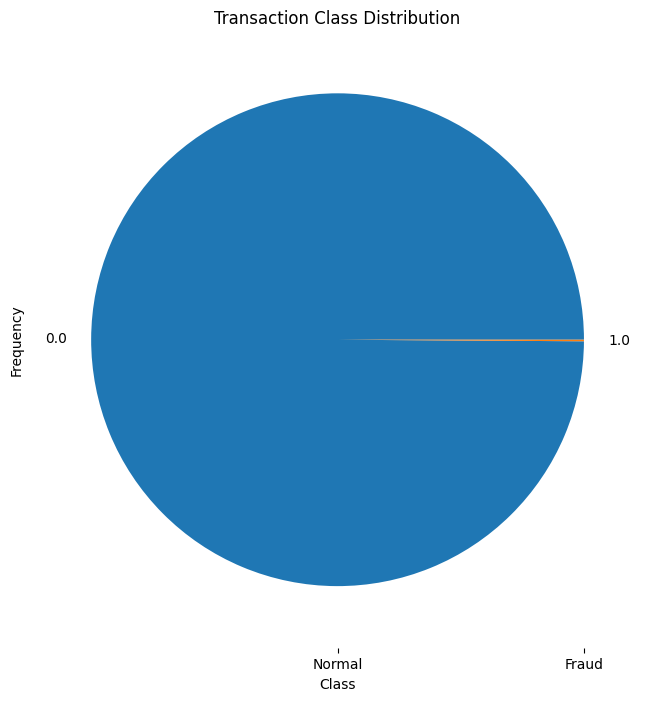

In [3]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'pie', rot=30)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [4]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [5]:
print(fraud.shape,normal.shape)

(2, 31) (1983, 31)


In [6]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [7]:
normal.Amount.describe()

count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64

# DATA VISUALISATION

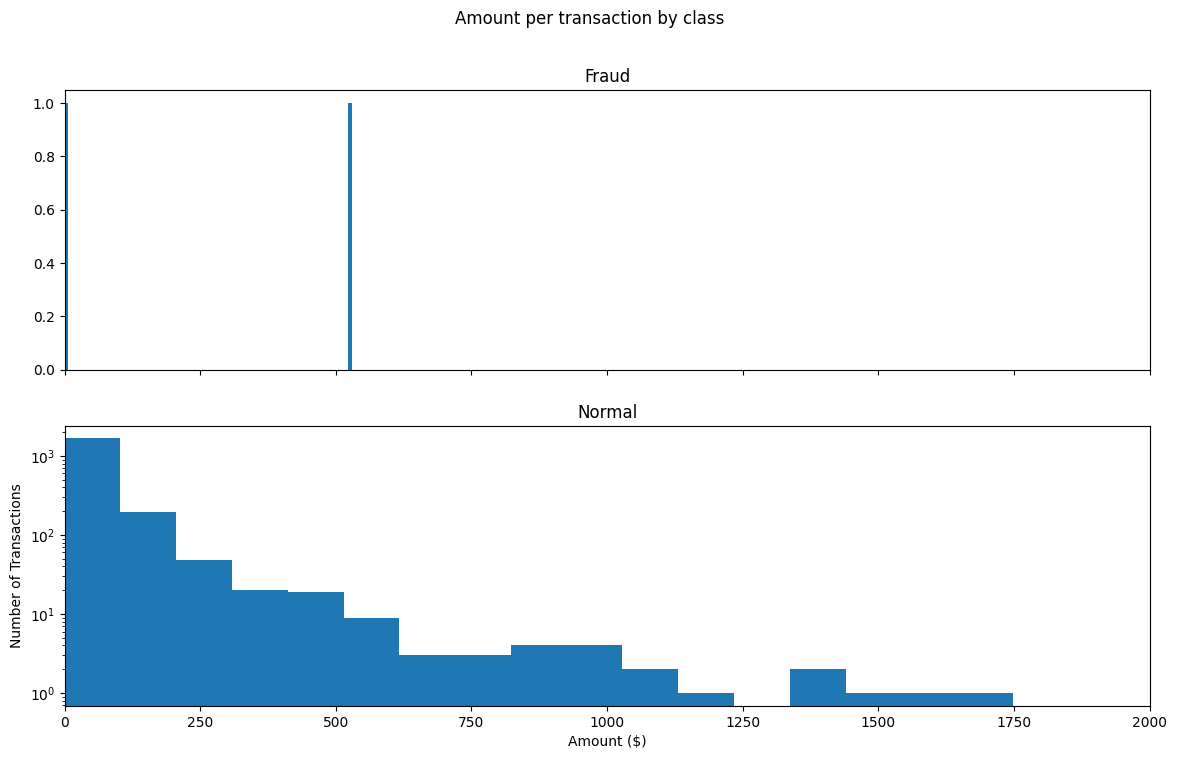

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 75
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 2000))
plt.yscale('log')
plt.show();

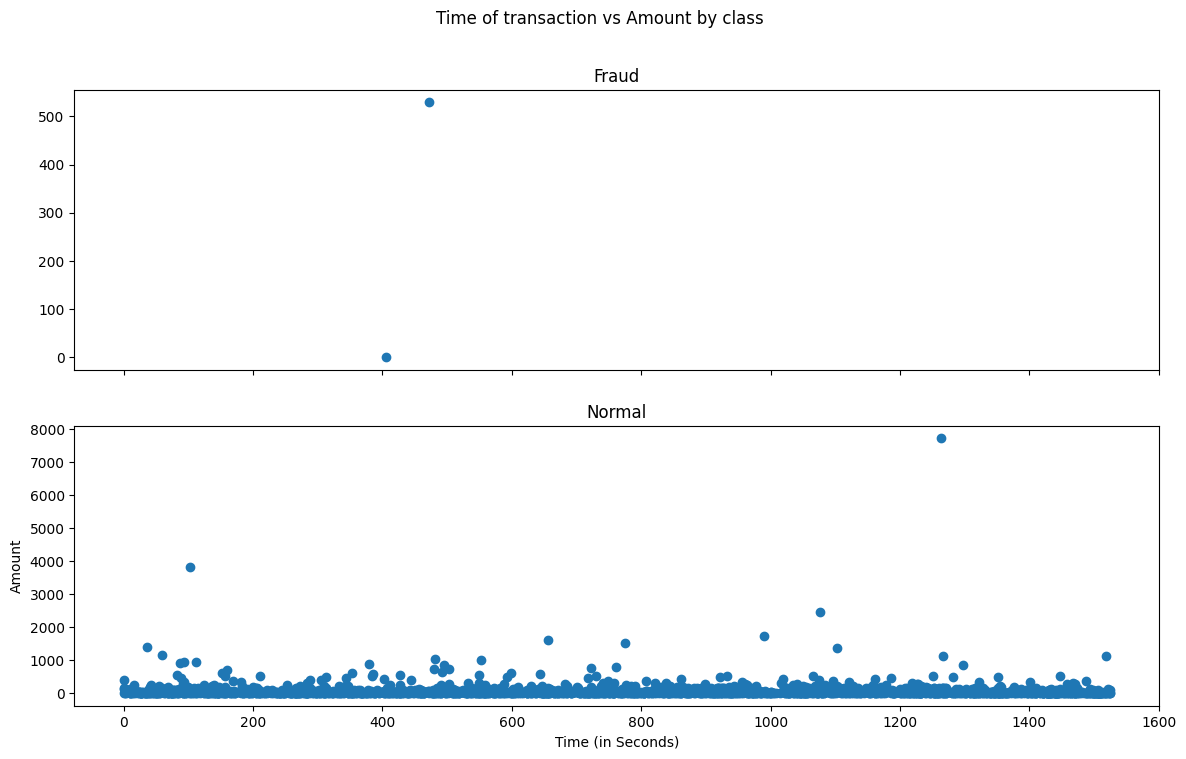

In [22]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [10]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(199, 31)

Determine the number of fraud and valid transactions in the dataset

In [11]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [12]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.005050505050505051
Fraud Cases : 1
Valid Cases : 198


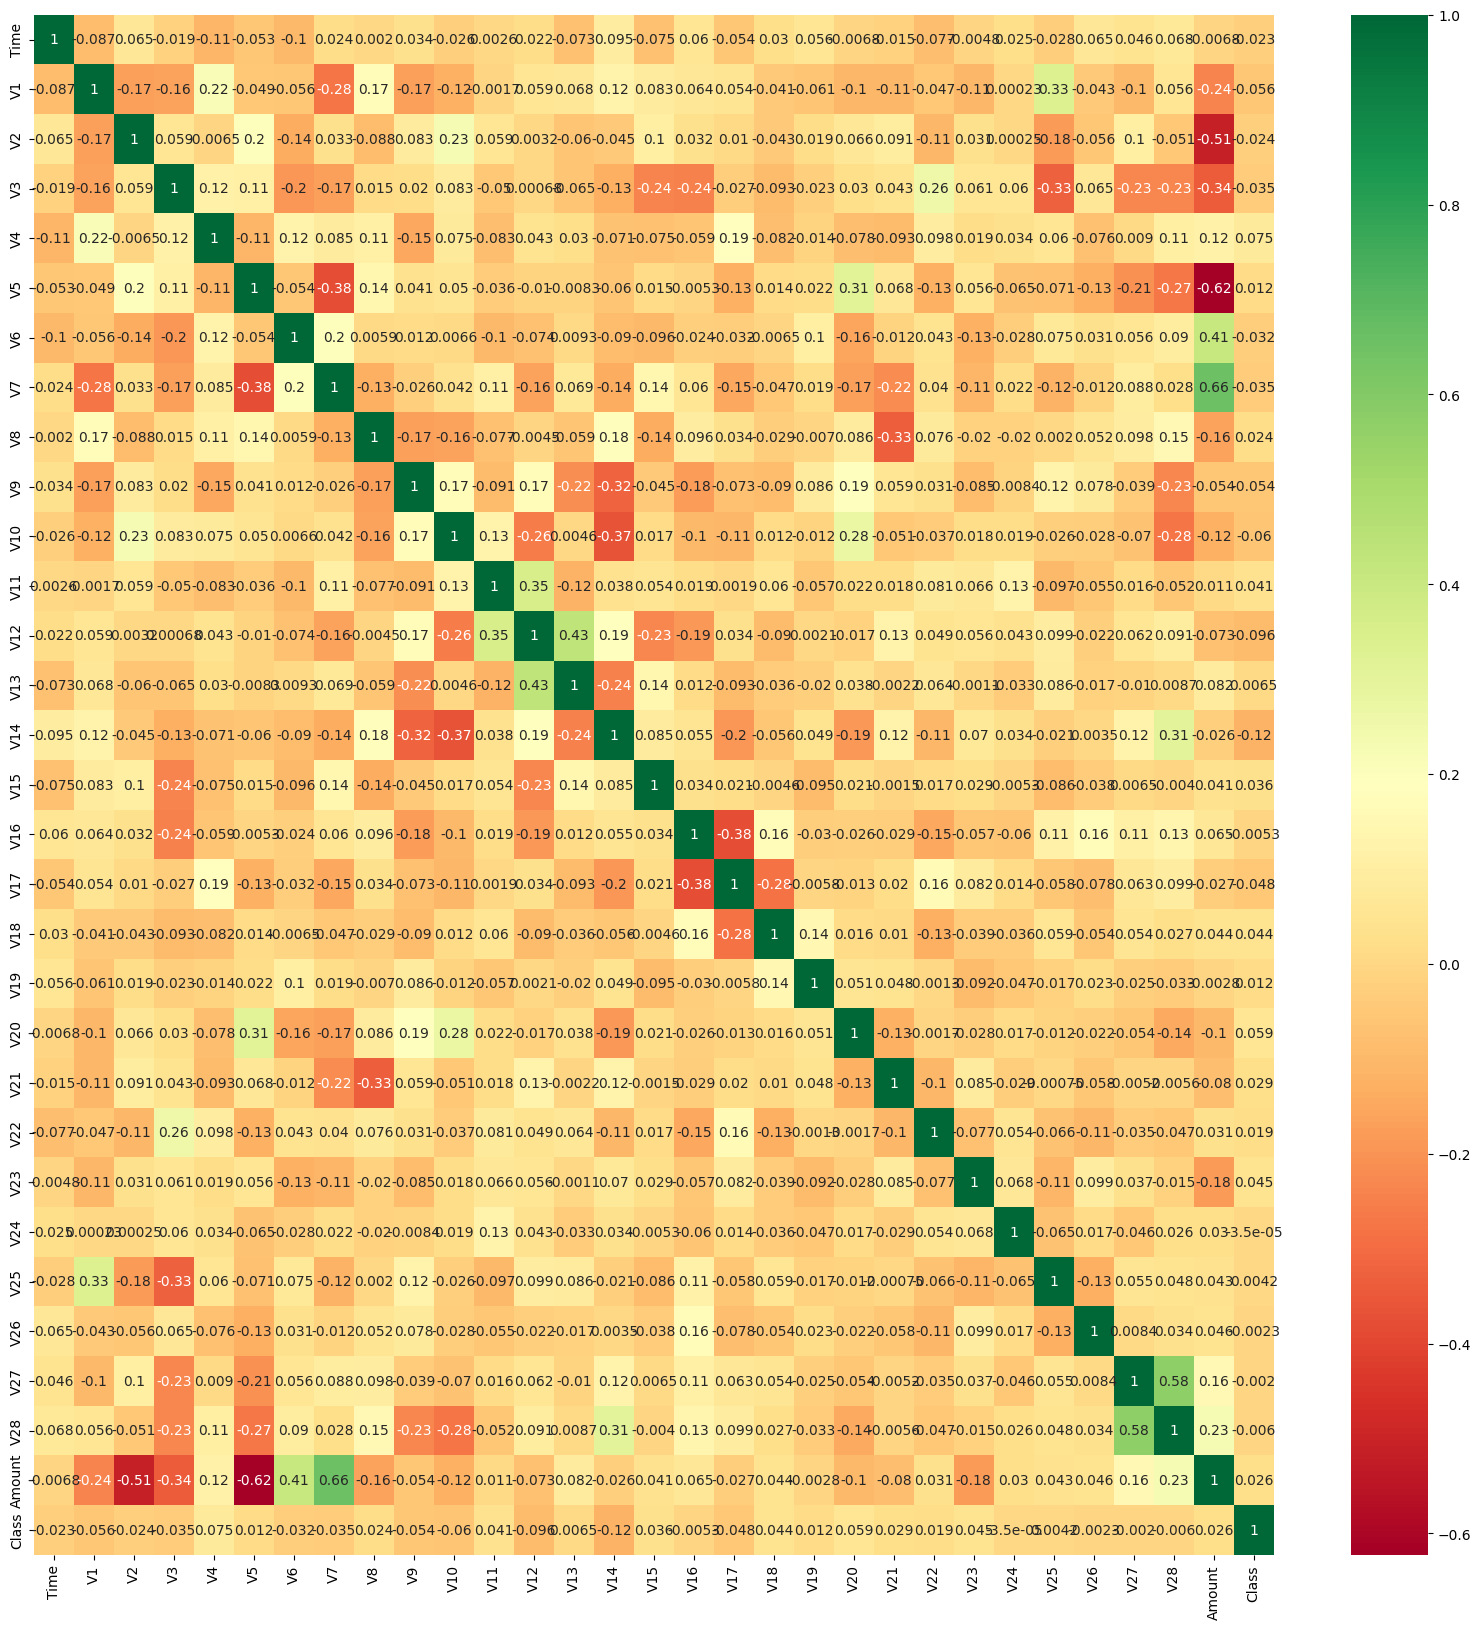

In [13]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Model Training and Evaluation

In [14]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(199, 30)
(199,)


## Model Prediction





The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
The Isolation Forest algorithm is an unsupervised machine learning algorithm used for anomaly detection. It was introduced by Fei Tony Liu, Kai Ming Ting, and Zhi-Hua Zhou in a paper titled "Isolation Forest" in 2008.

Here are the key concepts behind the Isolation Forest algorithm:

1. **Isolation Principle:**
   The algorithm is based on the idea that anomalies are isolated instances in a dataset. Normal data points are more likely to be grouped together, while anomalies are more likely to be isolated. This isolation principle is the foundation of the Isolation Forest algorithm.

2. **Random Partitioning:**
   The algorithm works by randomly selecting a feature and then choosing a random value within the range of that feature to create a partition. This process is repeated recursively, forming a tree-like structure. The depth of a data point in the tree structure is a measure of how isolated it is.

3. **Anomaly Score:**
   The anomaly score for a data point is determined by the average depth of the isolation trees in which the data point resides. If a data point has a lower average depth, it means it is more isolated and is likely to be an anomaly. The anomaly score can then be used to identify and rank potential anomalies in the dataset.

4. **Ensemble of Trees:**
   The Isolation Forest algorithm builds multiple isolation trees to enhance accuracy and robustness. The final anomaly score is typically an average or aggregate of the scores from individual trees.

5. **Scalability:**
   One of the advantages of the Isolation Forest algorithm is its ability to scale well to large datasets. The algorithm's computational complexity is linear with the number of data points, making it efficient for processing large datasets.

6. **Applications:**
   Isolation Forest is commonly used for outlier or anomaly detection in various domains, such as cybersecurity (detecting unusual network activity), fraud detection (identifying unusual patterns in financial transactions), and quality control in manufacturing.

7. **Parameter Tuning:**
   The main parameter to tune in Isolation Forest is the number of trees in the ensemble. Increasing the number of trees generally improves the accuracy of anomaly detection but comes at the cost of increased computation time.

In summary, the Isolation Forest algorithm is a useful tool for detecting anomalies in large datasets by leveraging the isolation principle and random partitioning to efficiently identify outliers.


### Local Outlier Factor(LOF) Algorithm
The Local Outlier Factor (LOF) algorithm is another unsupervised machine learning algorithm used for anomaly detection. It was introduced by Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng, and Jörg Sander in a paper titled "LOF: Identifying Density-Based Local Outliers" in 2000.

Here are the key concepts behind the Local Outlier Factor algorithm:

1. **Local Density Estimation:**
   LOF is based on the concept of local density. It calculates the density of data points in the vicinity of a given data point, taking into account the distances between the data point and its neighbors. Points in denser regions are assigned lower LOF scores, while points in sparser regions (potentially outliers) receive higher LOF scores.

2. **Relative Density:**
   The LOF of a data point is calculated by comparing its local density with the local densities of its neighbors. Anomalies are identified as data points with significantly lower local densities compared to their neighbors. In other words, anomalies are points that have a much lower density than their surrounding data points.

3. **k-Nearest Neighbors:**
   LOF uses the concept of k-nearest neighbors to estimate local densities. For each data point, its k-nearest neighbors are identified, and the local density is calculated based on the distances to these neighbors.

4. **LOF Score:**
   The LOF score for a data point is the average ratio of its local density to the local densities of its k-nearest neighbors. A score significantly higher than 1 indicates that the point is less dense than its neighbors, making it a potential outlier.

5. **Scalability:**
   LOF can be computationally expensive, especially for large datasets, because it involves calculating distances and densities. However, there are optimizations and approximate methods that can be applied to improve scalability.

6. **Applications:**
   LOF is commonly used in various applications, including fraud detection, network security, and quality control. It is particularly effective at identifying outliers in datasets with varying densities, where traditional methods such as distance-based approaches might struggle.

7. **Parameter Tuning:**
   The key parameter in LOF is the number of neighbors (k) used to estimate local densities. The choice of this parameter can impact the algorithm's sensitivity to outliers, and it may need to be tuned based on the characteristics of the dataset.

In summary, the Local Outlier Factor algorithm is a density-based approach for identifying outliers by comparing the local density of data points with that of their neighbors. It is particularly useful in scenarios where anomalies exhibit different density patterns compared to the majority of the data.

In [15]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,max_iter=-1)

}

## MODEL EVALUATION:

In [16]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 2
Accuracy Score :
0.9899497487437185
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       198
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       199
   macro avg       0.50      0.50      0.50       199
weighted avg       0.99      0.99      0.99       199

Local Outlier Factor: 0
Accuracy Score :
1.0
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       198
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

Support Vector Machine: 126
Accuracy Score :
0.36683417085427134
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.36      0.53       198

- Identified fraudulent credit card transactions in an imbalanced data (0.17% fraud rate) using unsupervised anomaly detection techniques
- Conducted data analysis and employed Isolation Forest, Local Outlier Factor, and Support Vector Machines models for fraud detection
- Outperformed all models, Isolation Forest achieved 99.664% accuracy and higher Recall with tuned hyperparameters in fraud detection